In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
auxilios = pd.read_excel('auxilios_novembro_2025.xlsx', skiprows=1)
auxilios.head()

KeyboardInterrupt: 

In [ ]:
auxilios.columns

Index(['APS', 'APS.1', 'Competência concessão', 'Espécie', 'Espécie.1', 'CID',
       'CID.1', 'Despacho', 'Despacho.1', 'Dt Nascimento', 'Sexo.',
       'Clientela', 'Mun Resid', 'Vínculo dependentes', 'Forma Filiação', 'UF',
       'Qt SM RMI', 'Ramo Atividade', 'Dt DCB', 'Dt DDB', 'Dt DIB',
       'País de Acordo Internacional', 'Classificador PA', 'CNAE 2.0',
       'CNAE 2.0.1', 'Grau Instrução', 'Qt Anos Contribuição'],
      dtype='object')

In [ ]:
def limpeza_auxilios(auxilios): 
    auxilios = auxilios.copy()

    auxilios.columns = (
        auxilios.columns
        .str.strip() #remove os espaços antes e depois
        .str.normalize('NFKD') #remove acentos
    )
    
    colunas_para_remover = [
        'APS', 'APS.1', 'Competência concessão', 'Espécie', 'CID', 'Despacho', 'Mun Resid', 'País de Acordo Internacional', 'CNAE 2.0', 'CNAE 2.0.1'
    ]
    auxilios.drop(columns=colunas_para_remover, inplace=True, errors='ignore')

    renomear_colunas = {
        'Espécie.1' : 'Tipos de auxilio', 
        'CID.1' : 'CID',
        'Despacho.1' : 'Despacho',
        'Dt Nascimento' : 'Data nasc',
        'Sexo.' : 'Sexo',
        'Qt SM RMI' : 'Quant salarios minimos na RMI',
        'Dt DCB' : 'Data DCB',
        'Dt DDB' : 'Data DDB',
        'Dt DIB' : 'Data DIB',
        'Classificador PA' : 'Pensão Alimenticia'
    }
    auxilios.rename(columns=renomear_colunas, inplace=True)

    #arredonda para duas casas decimais
    auxilios['Quant salarios minimos na RMI'] = auxilios['Quant salarios minimos na RMI'].round(2)

    #transformar o que é string para datetime
    for col in ["Data DCB", "Data DDB", "Data DIB", "Data nasc"]:
        auxilios[col] = pd.to_datetime(auxilios[col], errors="coerce", dayfirst=True)

    #onde tem valores faltando colocar 'nao informado'
    auxilios['CID'] = auxilios['CID'].fillna('Não informado')
    
    #apaga a duplicada e deixa a original
    auxilios.drop_duplicates(inplace=True)

    # Reordenar DIB(inicio), DDB(despacho/analise), DCB(fim)
    auxilios = auxilios[
        [c for c in auxilios.columns if c not in ["Data DCB", "Data DDB", "Data DIB"]]
        + ["Data DIB", "Data DDB", "Data DCB"]
    ]

    return auxilios


In [ ]:
auxilios = limpeza_auxilios(auxilios)

In [ ]:
auxilios

,Tipos de auxilio,CID,Despacho,Data nasc,Sexo,Clientela,Vínculo dependentes,Forma Filiação,UF,Quant salarios minimos na RMI,Ramo Atividade,Pensão Alimenticia,Grau Instrução,Qt Anos Contribuição,Data DIB,Data DDB,Data DCB
0,Auxílio Doenca Previdenciário,D25.1 Leiomioma Intramural do Utero,Concessao com Analise Documental,1984-07-04,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.50,Comerciario,Sem Pensâo Alimentícia,Não Informado,9,2025-10-11,2025-11-01,2025-10-25
1,Auxílio Doenca por Acidente do Trabalho,F33.1 Transt Depress Recorr Episodio Atual Mo,Concessao com Analise Documental,1990-09-01,Feminino,Urbano,Não Informado,Empregado,Alagoas,2.06,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-31,2025-11-01,2025-12-29
2,Auxílio Doenca Previdenciário,M23 Transt Internos dos Joelhos,Concessao com Analise Documental,1987-12-29,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,0,2025-10-30,2025-11-01,2025-12-13
3,Auxílio Doenca Previdenciário,S92 Frat do Pe,Concessao com Analise Documental,1987-05-05,Feminino,Urbano,Não Informado,Empregado,Alagoas,1.46,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-22,2025-11-01,2025-12-19
4,Auxílio Doenca Previdenciário,M51.1 Transt Disco Lombar Outr Intervert Radi,Concessao com Analise Documental,1991-03-08,Masculino,Urbano,Não Informado,Desempregado,Alagoas,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-10-23,2025-11-01,2025-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584916,Auxílio Doenca Previdenciário,F41.2 Transt Misto Ansioso e Depressivo,Concessao com Analise Documental,1997-10-04,Feminino,Urbano,Não Informado,Desempregado,Tocantins,1.08,Comerciario,Sem Pensâo Alimentícia,Não Informado,2,2025-11-24,2025-11-29,2025-12-23
584917,Auxílio Doenca Previdenciário,N80 Endometriose,Concessao com Analise Documental,1988-07-24,Feminino,Urbano,Não Informado,Empregado,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,6,2025-11-19,2025-11-29,2026-01-02
584918,Auxílio Doenca Previdenciário,G56.0 Sindr do Tunel do Carpo,Concessao com Analise Documental,1973-11-23,Feminino,Urbano,Não Informado,Autônomo,Tocantins,1.00,Comerciario,Sem Pensâo Alimentícia,Não Informado,11,2025-10-27,2025-11-29,2025-12-25
584919,Amp. Social Pessoa Portadora Deficiencia,Zerados,Concessao Decorrente de Acao Judicial,1978-02-13,Masculino,Rural,Não Informado,Desempregado,Tocantins,1.00,Rural,Sem Pensâo Alimentícia,Não Informado,0,2024-08-13,2025-11-29,NaT


In [ ]:
auxilios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580803 entries, 0 to 584920
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Tipos de auxilio               580803 non-null  object        
 1   CID                            580803 non-null  object        
 2   Despacho                       580803 non-null  object        
 3   Data nasc                      580803 non-null  datetime64[ns]
 4   Sexo                           580803 non-null  object        
 5   Clientela                      580803 non-null  object        
 6   Vínculo dependentes           580803 non-null  object        
 7   Forma Filiação               580803 non-null  object        
 8   UF                             580803 non-null  object        
 9   Quant salarios minimos na RMI  580803 non-null  float64       
 10  Ramo Atividade                 580803 non-null  object        
 11  Pensã

In [ ]:
#retorna True se qualquer coluna tiver nulo (Nan ou None)
#auxilios.isna().any().any()

In [ ]:
#retorna quantos nulos tem por coluna
#auxilios.isna().sum()

In [ ]:
#mostra quantidade de duplicada
#auxilios.duplicated().sum()

In [ ]:
#mostra as colunas duplicadas, a original e a outra 
#auxilios[auxilios.duplicated(keep=False)]

In [ ]:
#retorna somente as colunas duplicadas, sem mostrar a original
#auxilios[auxilios.duplicated()]

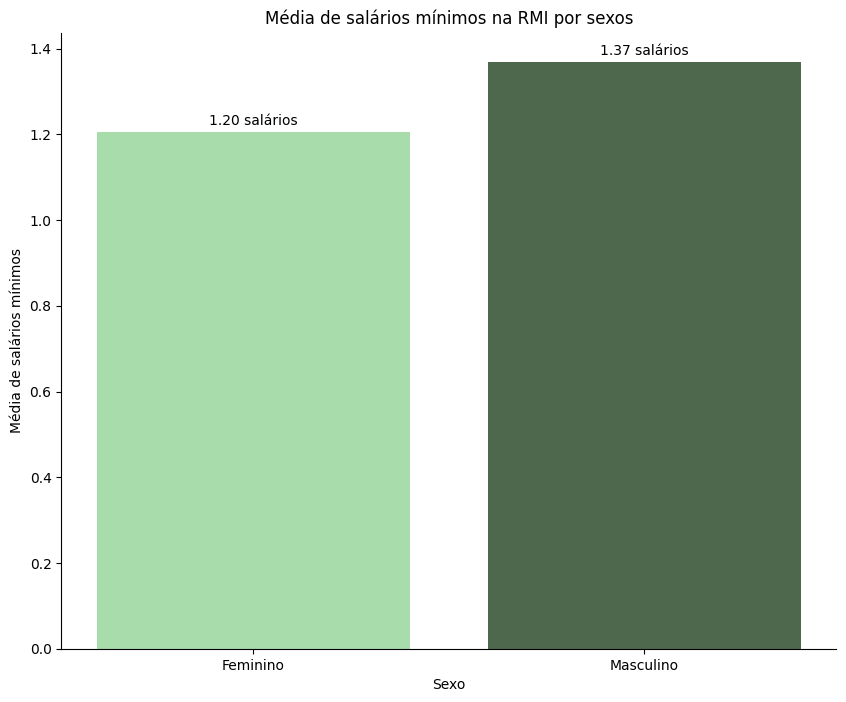

In [ ]:
#pega a linha onde sexo = feminino e depois pega a quant de salarios dessas linhas
media_fem = auxilios.loc[auxilios['Sexo'] == 'Feminino', 'Quant salarios minimos na RMI'].mean()
media_masc = auxilios.loc[auxilios['Sexo'] == 'Masculino', 'Quant salarios minimos na RMI'].mean()

diferenca = abs(media_fem - media_masc)

fig, ax = plt.subplots(figsize=(10, 8))

barras = ax.bar(['Feminino', 'Masculino'],
    [media_fem, media_masc],
    color=['#A8DCAB', '#4E684E']
)

ax.set_title('Média de salários mínimos na RMI por sexos')
ax.set_xlabel('Sexo')
ax.set_ylabel('Média de salários mínimos')
ax.bar_label(barras, fmt='%.2f salários', padding=3)

ax.spines['top'].set_visible(False) #borda
ax.spines['right'].set_visible(False) 

plt.show()


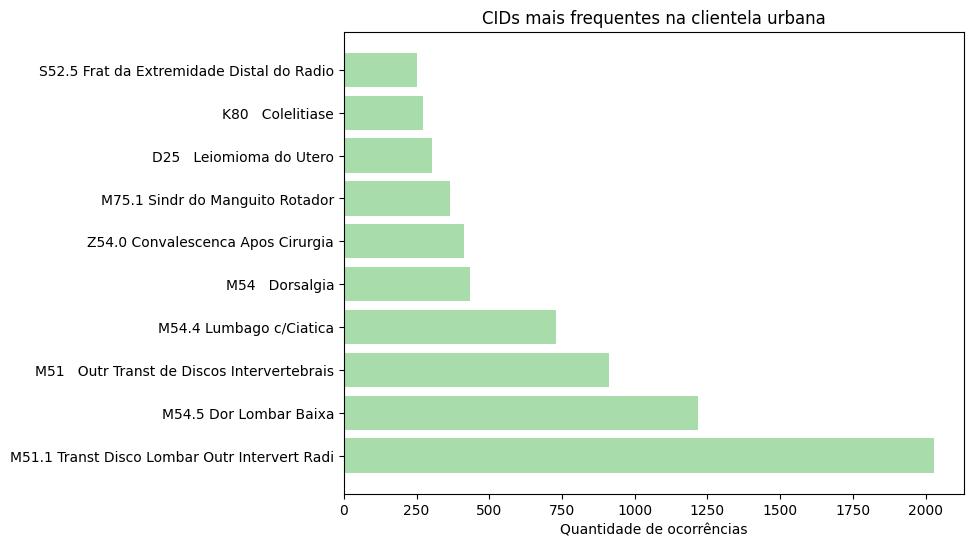

In [ ]:
#filtrando e tirando os cid 'vazios'
cli_urbana = auxilios.loc[auxilios['Clientela'] == 'Rural', 'CID']
cli_urbana = cli_urbana[~cli_urbana.isin(['Zerados', 'Em Branco', '{ñ class}'])] #mantem somente os CIDs que nao estao nessa condição

contagem = cli_urbana.value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(contagem.index,
        contagem.values,
        color='#A8DCAB'
        )
plt.title('CIDs mais frequentes na clientela urbana')
plt.xlabel('Quantidade de ocorrências')

plt.show()


In [ ]:
#Qual a proporção da forma filiação dos beneficiarios? 
    #e se for possivel, fazer essa proporção por estado, usando o grafico de pizza

In [ ]:
proporcao = (auxilios.groupby('UF')['Forma Filiação'] #agrupa por uf, pega a coluna forma filiação
                        .value_counts(normalize=True) #normaliza para retornar as proporções
                        .unstack(fill_value=0) #Antes retornava uma Series, que tem indice multinivel, as linhas eram combinações de UF e de Forma de Filiação, e agora é um DataFrame, com as linhas sendo os uf e as colunas as formas de filiação. E coloca 0 
                        ) 
proporcao

Forma Filiação,Autônomo,Desempregado,Doméstico,Empregado,Empresário,Equiparado a Autônomo,Facultativo,Optante Pela Lei 6.184/74,Segurado Especial,Trabalhador Avulso
UF,,,,,,,,,,
Acre,0.105061,0.203520,0.018152,0.449945,0.000000,0.000000,0.020902,0.000550,0.201870,0.000000
Alagoas,0.207575,0.242546,0.021595,0.284126,0.000000,0.000000,0.057373,0.000645,0.185012,0.001128
Amapá,0.059161,0.199885,0.013211,0.304997,0.000000,0.000000,0.018380,0.000000,0.403791,0.000574
Amazonas,0.082340,0.221946,0.013694,0.267829,0.000178,0.000000,0.021519,0.000000,0.391962,0.000534
Bahia,0.135217,0.199045,0.016023,0.226582,0.000080,0.000000,0.048839,0.000106,0.373790,0.000318
Ceará,0.148723,0.262336,0.014481,0.233821,0.000198,0.000000,0.050632,0.000099,0.289164,0.000545
Distrito Federal,0.297753,0.190698,0.032075,0.153216,0.000070,0.000000,0.120459,0.000000,0.205397,0.000332
Espírito Santo,0.228418,0.225097,0.025761,0.373254,0.000343,0.000000,0.033776,0.000000,0.110946,0.002404
Goiás,0.217196,0.216929,0.026564,0.366143,0.000000,0.000000,0.029307,0.000000,0.143125,0.000736


In [ ]:
coordenadas_uf = {
    'Acre': [-9.0238, -70.812],   'Alagoas': [-9.5713, -36.782],
    'Amapá': [0.9020, -52.003],    'Amazonas': [-3.4168, -65.8561],
    'Bahia': [-12.5797, -41.7007], 'Ceará': [-5.4984, -39.3206],
    'Distrito Federal': [-15.7801, -47.9292], 'Espírito Santo': [-19.1834, -40.3089],
    'Goiás': [-15.8270, -49.8362], 'Maranhão': [-4.9609, -45.2744],
    'Mato Grosso': [-12.6819, -56.9211], 'Mato Grosso do Sul': [-20.7722, -54.7852],
    'Minas Gerais': [-18.5122, -44.555],  'Pará': [-1.9981, -54.9306],
    'Paraíba': [-7.2399, -36.782],   'Paraná': [-24.89, -51.55],
    'Pernambuco': [-8.8137, -36.9541],  'Piauí': [-6.6695, -42.28],
    'Rio de Janeiro': [-22.9099, -43.2095], 'Rio Grande do Norte': [-5.4026, -36.9541],
    'Rio Grande do Sul': [-30.0346, -51.2177], 'Rondônia': [-10.83, -63.34],
    'Roraima': [2.7376, -62.0751],   'Santa Catarina': [-27.2423, -50.2189],
    'Sergipe': [-10.5741, -37.3857], 'São Paulo': [-23.5505, -46.6333],
    'Tocantins': [-10.1753, -48.2982]
}


In [ ]:
cores_filiacao = {
    'Autônomo': '#E74C3C',           # Vermelho vibrante
    'Desempregado': '#3498DB',       # Azul royal
    'Doméstico': '#1ABC9C',          # Verde turquesa
    'Empregado': '#673AB7',          # Roxo escuro 
    'Empresário': '#F39C12',         # Laranja forte
    'Equiparado a Autônomo': '#95A5A6',  # Cinza médio
    'Facultativo': '#E91E63',        # Rosa pink
    'Optante Pela Lei 6.184/74': '#9B59B6',  # Roxo 
    'Segurado Especial': '#FF9800',  # Laranja âmbar
    'Trabalhador Avulso': '#2ECC71'  # Verde esmeralda 
}

In [ ]:
import matplotlib.pyplot as plt
import io
import base64
from PIL import Image

def criar_grafico_pizza(valores, labels):
    cores = [cores_filiacao.get(label, '#CCCCCC') for label in labels]
    
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.pie(valores, labels=None, startangle=90, colors=cores)
    ax.axis('equal')
    
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight', transparent=True)
    buffer.seek(0)
    plt.close(fig)
    
    imagem_base64 = base64.b64encode(buffer.read()).decode()
    return f'data:image/png;base64,{imagem_base64}'


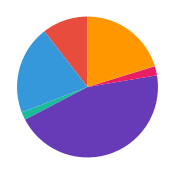
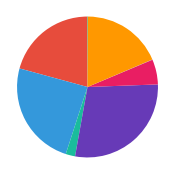
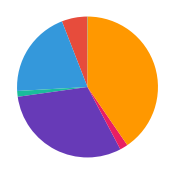
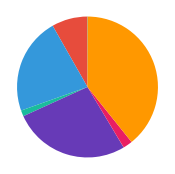
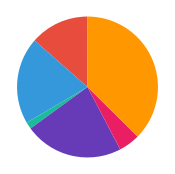
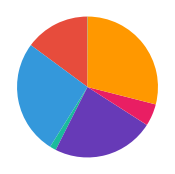
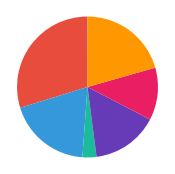
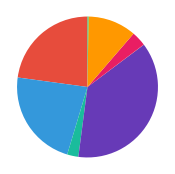
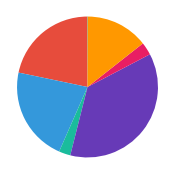
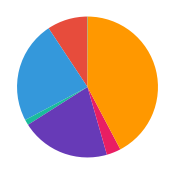
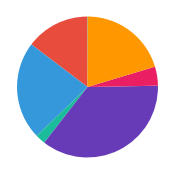
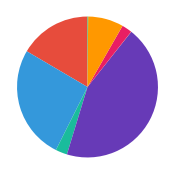
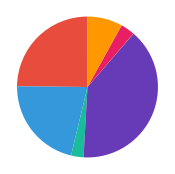
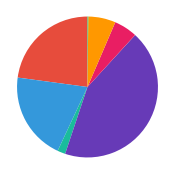
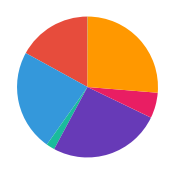
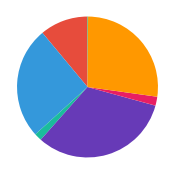
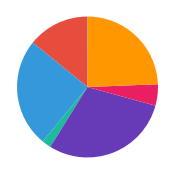
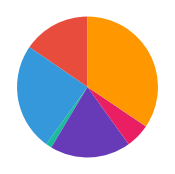
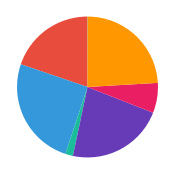
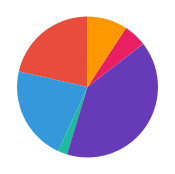
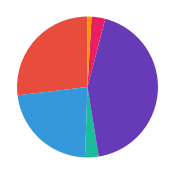
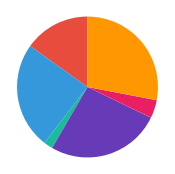
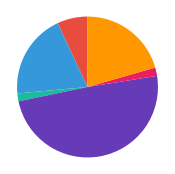
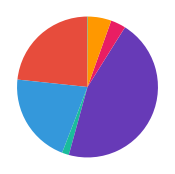
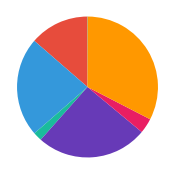
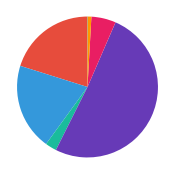
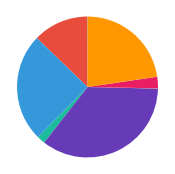

In [ ]:
import folium

mapa = folium.Map(
    location=[-15.7801, -47.9292],
    zoom_start=4,
    tiles='OpenStreetMap'
)

for uf_nome in proporcao.index:
    if uf_nome in coordenadas_uf:
        valores = proporcao.loc[uf_nome]
        valores = valores[valores > 0]
        
        if len(valores) > 0:
            # Gera o gráfico
            imagem = criar_grafico_pizza(valores.values, valores.index)
            
            # Cria tabela com as porcentagens no popup
            tabela_html = '<table style="width:100%; font-size:11px;">'
            for label, valor in zip(valores.index, valores.values):
                cor = cores_filiacao.get(label, '#CCC')
                tabela_html += f'''
                <tr>
                    <td><span style="background:{cor}; width:12px; height:12px; 
                                     display:inline-block; border:1px solid #000;"></span></td>
                    <td>{label}</td>
                    <td style="text-align:right;"><b>{valor*100:.1f}%</b></td>
                </tr>
                '''
            tabela_html += '</table>'
            
            popup_html = f'''
            <div style="text-align:center; min-width:250px;">
                <h4 style="margin:5px 0;">{uf_nome}</h4>
                <img src="{imagem}" width="150" height="150">
                <hr style="margin:10px 0;">
                {tabela_html}
            </div>
            '''
            
            html = f'<img src="{imagem}" width="100" height="100">'
            icon = folium.DivIcon(html=html)

            # Adiciona um círculo no mapa
            folium.CircleMarker(
                location=coordenadas_uf[uf_nome],
                icon=icon,
                radius=5,
                color='#4E684E',
                fill=True,
                fillColor='#A8DCAB',
                fillOpacity=0.6,
                popup=folium.Popup(popup_html, max_width=250)
            ).add_to(mapa)
            
mapa

In [ ]:
print(proporcao.index)
print(coordenadas_uf.keys())

Index(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype='object', name='UF')
dict_keys(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'])


Plotagens - Sabrina

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

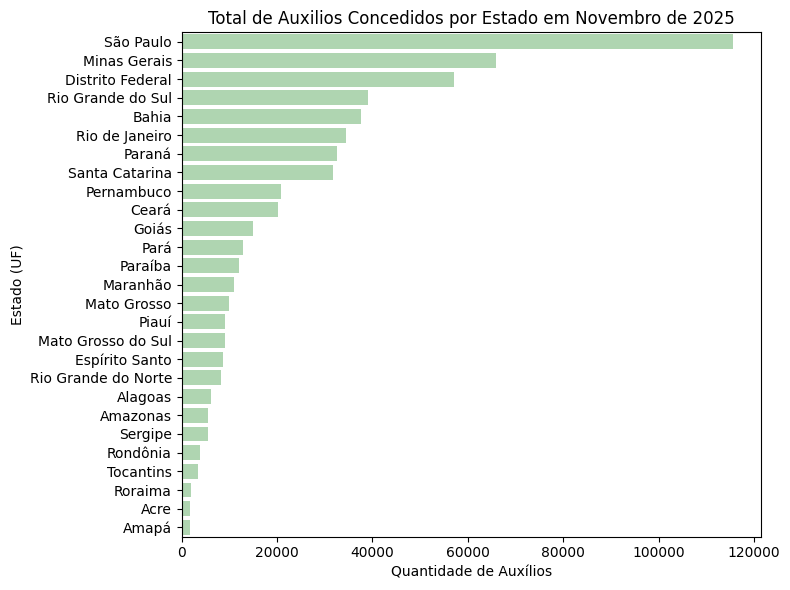

In [ ]:
#Total de Auxílios por Estado
df_auxilios_por_UF = auxilios['UF'].value_counts().reset_index()
df_auxilios_por_UF.columns = ['UF', 'Total de Auxilios Concedidos']

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_auxilios_por_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    color='#A8DCAB'
)
plt.title('Total de Auxilios Concedidos por Estado em Novembro de 2025')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

In [ ]:
#Lê o arquivo de dados populacional
populacao = pd.read_excel('dados_populacional.xlsx',skiprows=3)
populacao['População_residente'] = populacao['População_residente'].astype(int)
populacao["Unidade da Federação"] = populacao["Unidade da Federação"].str.split(" ", n=1).str[1]

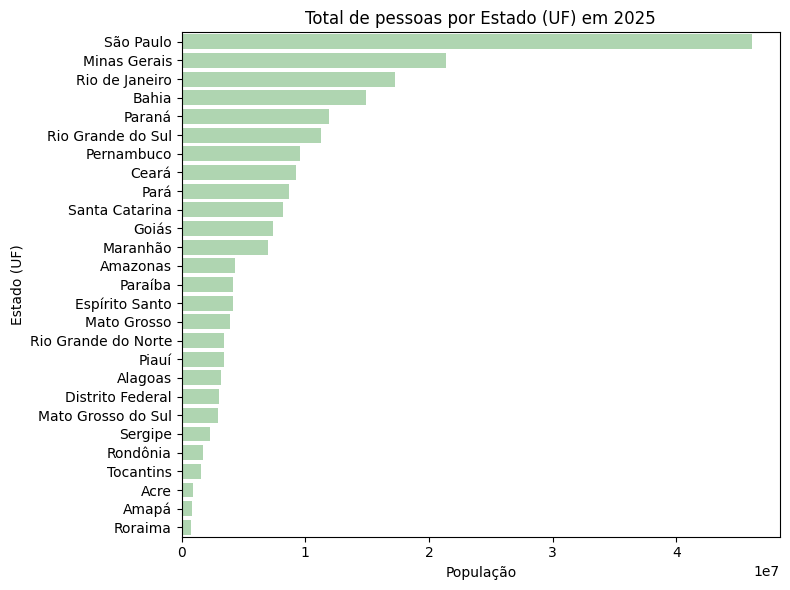

In [ ]:
#Exibe a quantidade de pessoas por estado
populacao = populacao.sort_values('População_residente', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(
    data=populacao,
    y='Unidade da Federação',
    x='População_residente',
    color='#A8DCAB'
)
plt.title('Total de pessoas por Estado (UF) em 2025')
plt.xlabel('População')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

In [ ]:
#Cria df com percentual de auxilios concedidos em comparação com a população
comparacao = pd.merge(df_auxilios_por_UF, populacao, left_on='UF',right_on='Unidade da Federação')
comparacao['porcentagem_auxilio'] = ((comparacao['Total de Auxilios Concedidos'] / comparacao['População_residente']) * 100).round(2)
comparacao = comparacao.sort_values('porcentagem_auxilio', ascending=False)
comparacao

,UF,Total de Auxilios Concedidos,Unidade da Federação,População_residente,porcentagem_auxilio
2,Distrito Federal,57148,Distrito Federal,2996899,1.91
7,Santa Catarina,31726,Santa Catarina,8187029,0.39
3,Rio Grande do Sul,39089,Rio Grande do Sul,11233263,0.35
1,Minas Gerais,65987,Minas Gerais,21393441,0.31
16,Mato Grosso do Sul,9028,Mato Grosso do Sul,2924631,0.31
12,Paraíba,12064,Paraíba,4164468,0.29
6,Paraná,32615,Paraná,11890517,0.27
15,Piauí,9120,Piauí,3384547,0.27
14,Mato Grosso,9834,Mato Grosso,3893659,0.25
0,São Paulo,115577,São Paulo,46081801,0.25


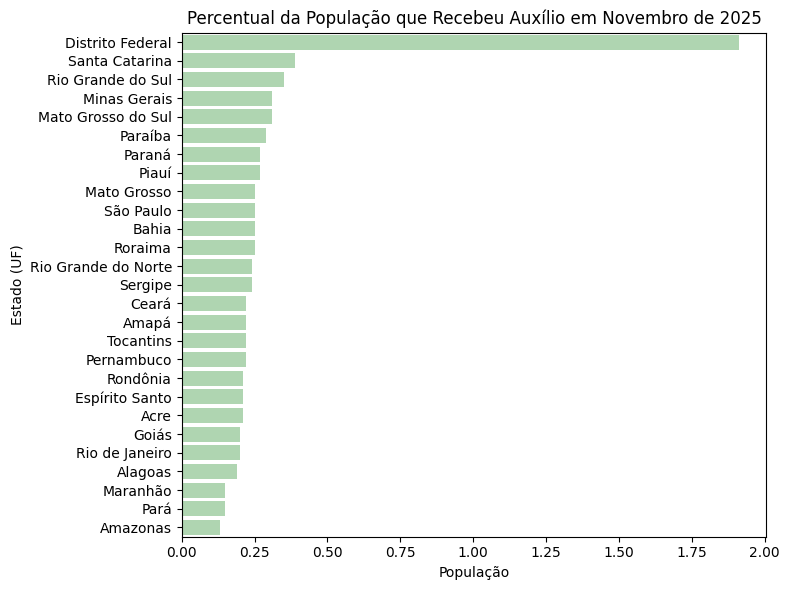

In [ ]:
#Exibe o percentual de auxilios distribuidos comparado com a população
plt.figure(figsize=(8,6))
sns.barplot(
    data=comparacao,
    y='UF',
    x='porcentagem_auxilio',
    color='#A8DCAB',
)
plt.title('Percentual da População que Recebeu Auxílio em Novembro de 2025')
plt.xlabel('População')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

In [ ]:
#Exibe a média de dias de duração de beneficio
intervalo = auxilios['Data DCB'] - auxilios['Data DIB']
media = intervalo.mean()
media = media.days

print(f"Média de duração do auxilio: {media} dias")

Média de duração do auxilio: 109 dias


In [ ]:
#Exibe a média de dias de duração de beneficio para mulheres
df_mulheres = auxilios[auxilios['Sexo'] == 'Feminino']
intervalo_mulheres = df_mulheres['Data DCB'] - df_mulheres['Data DIB']
media_mulheres = intervalo_mulheres.mean()
media_mulheres = media_mulheres.days

print(f"Média de Duração do Auxilio para o Público Feminino: {media_mulheres} dia")


Média de Duração do Auxilio para o Público Feminino: 108 dia


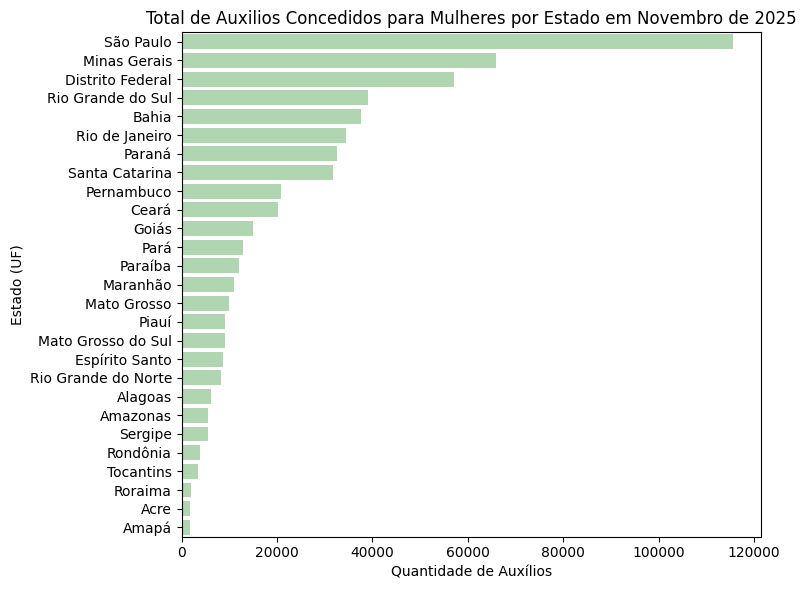

In [91]:
#Total de Auxílios para mulheres por Estado
df_mulheres_UF = auxilios['UF'].value_counts().reset_index()
df_mulheres_UF.columns = ['UF', 'Total de Auxilios Concedidos']

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_mulheres_UF,
    y='UF',
    x='Total de Auxilios Concedidos',
    color='#A8DCAB'
)
plt.title('Total de Auxilios Concedidos para Mulheres por Estado em Novembro de 2025')
plt.xlabel('Quantidade de Auxílios')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()

In [30]:
#Exibe a média de dias de duração de beneficio para homens
df_homens = auxilios[auxilios['Sexo'] == 'Masculino']
intervalo_homens = df_homens['Data DCB'] - df_homens['Data DIB']
media_homens = intervalo_homens.mean()
media_homens = media_homens.days

print(f"Média de Duração do Auxilio para o Público Masculino: {media_homens}")


Média de Duração do Auxilio para o Público Masculino: 110


In [60]:
from datetime import datetime
#Trata para que células vazias de data final do beneficio sejam substituidas pela data atual
auxilios['Data DCB'] = auxilios['Data DCB'].fillna(datetime.now())
auxilios['Duração'] = auxilios['Data DCB'] - auxilios['Data DIB']

In [85]:
#Exibe a média de dias de duração de beneficio por profissão
df_media_profissao = auxilios.groupby('Ramo Atividade')['Duração'].mean().reset_index()
df_media_profissao['Duração'] = df_media_profissao['Duração'].dt.days
df_media_profissao = df_media_profissao.sort_values('Duração', ascending=False)
df_media_profissao

,Ramo Atividade,Duração
3,Industriario,4141
2,Ferroviario,3948
0,Bancario,3215
5,Maritimo,1264
8,Transportes e Carga,1255
4,Irrelevante,591
7,Servidor Publico,568
6,Rural,261
1,Comerciario,184


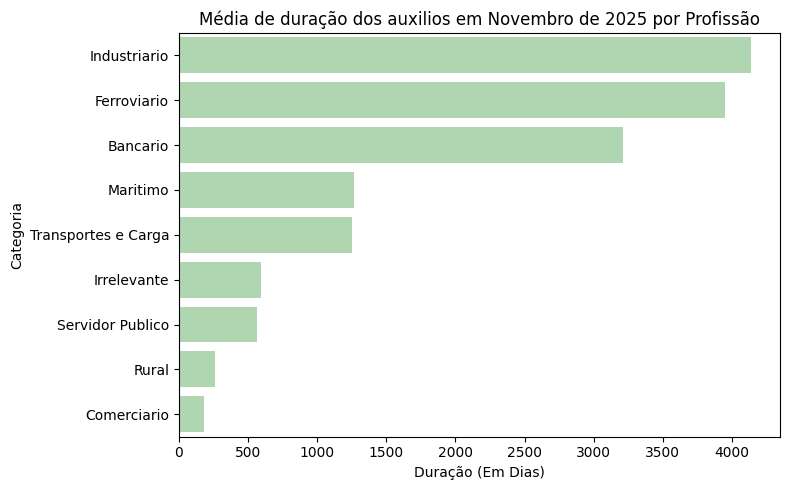

In [86]:
#Exibe a média de dias de duração de beneficio por profissao
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_media_profissao,
    y='Ramo Atividade',
    x='Duração',
    color='#A8DCAB',
)
plt.title('Média de duração dos auxilios em Novembro de 2025 por Profissão')
plt.xlabel('Duração (Em Dias)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()